EXERCICI 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.


In [1]:
import pandas as pd

df=pd.read_csv('C:\\Users\\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\CLUSTERNING\\M8\\Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df.shape

(7050, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
#escojo las columnas que quiero para el clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

columns_for_clustering = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df=df[columns_for_clustering].dropna()


In [5]:
#dividimos los datos para entrenar y testear el modelo

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']], df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']], test_size=0.33, random_state=0)

In [6]:
#normalizo los datos de entrenamiento y test

from sklearn import preprocessing

x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

In [32]:
#creamos el modelo kmeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 42, n_init=10)
kmeans.fit(x_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [34]:
#hago un grafico
#agrego etiquetas a los clusteres del dataframe de entrenamiento

#etiqueto los puntos en el conjunto de entrenamiento

train_labels=kmeans.predict(x_train_norm)

#aplico PCA para reducir la dimensionalidad a 2 componentes principales

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
x_train_pca =pca.fit_transform(x_train_norm)



In [35]:
#Creo dataframe con las caracteristicas reducidas y las etiquetas

df_pca = pd.DataFrame(x_train_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['cluster'] = train_labels


In [57]:
#miro el rendimiento por el indice Silhouette

from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df_pca[['Componente Principal 1', 'Componente Principal 2']], df_pca['cluster'])
print(f"Silhouette Score: {silhouette}, es un buen rendimiento")

Silhouette Score: 0.8505185052236028, es un buen rendimiento


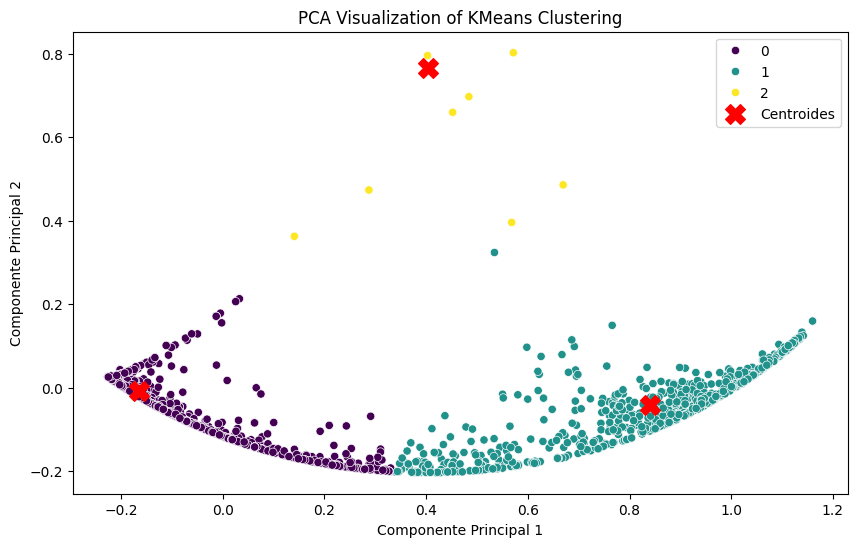

In [11]:
#visualizo los datos
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='cluster', data=df_pca, palette='viridis')

#añado los centroides a los clusteres
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, color='red', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA Visualization of KMeans Clustering')
plt.legend()
plt.show()



EXERCICI 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [12]:
columns_for_clustering = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df=df[columns_for_clustering].dropna()
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


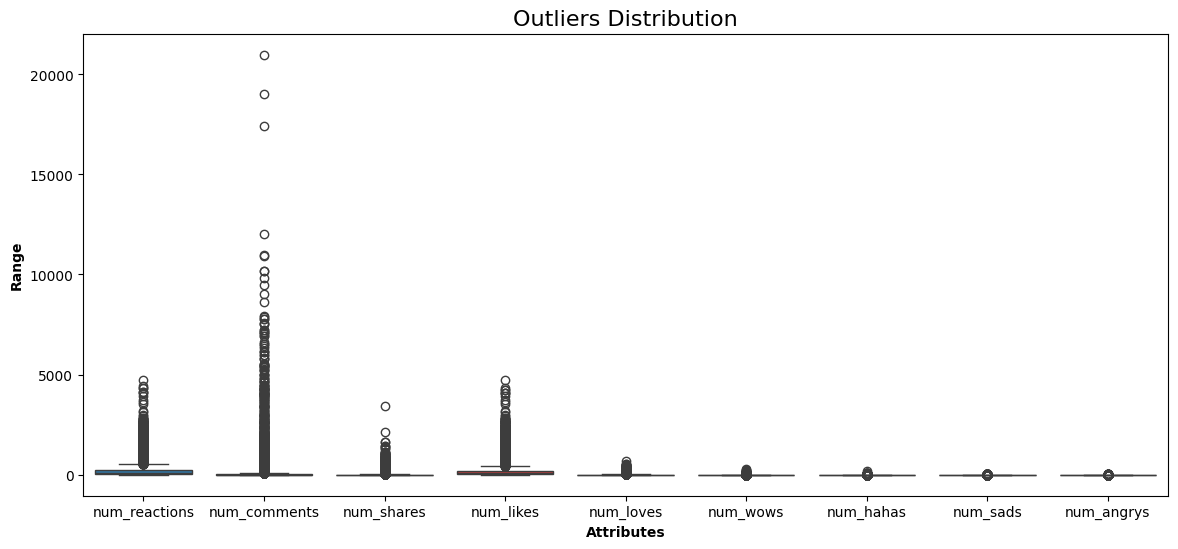

In [13]:
#busco los valores atípicos ya que el modelo es muy sensible a ellos
import matplotlib.pyplot as plt

def show_boxplot(df):                       #se genera un boxplot para visualizar la distribucion de valores atipicos
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(df)

In [14]:
#eliminamos los valores atípicos

def remove_outliers(df):
   
    data = df.copy()
   
    for col in list(df.columns):
 
      Q1 = data[str(col)].quantile(0.05)
      Q3 = data[str(col)].quantile(0.95)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR
 
      data = data[(data[str(col)] >= lower_bound) & (data[str(col)] <= upper_bound)]
   
    return data



In [15]:
#aplico la función

without_outliers = remove_outliers(df)

In [16]:
without_outliers.shape          #el dataframe se ha reducido al sacar los valores atípicos

(6320, 9)

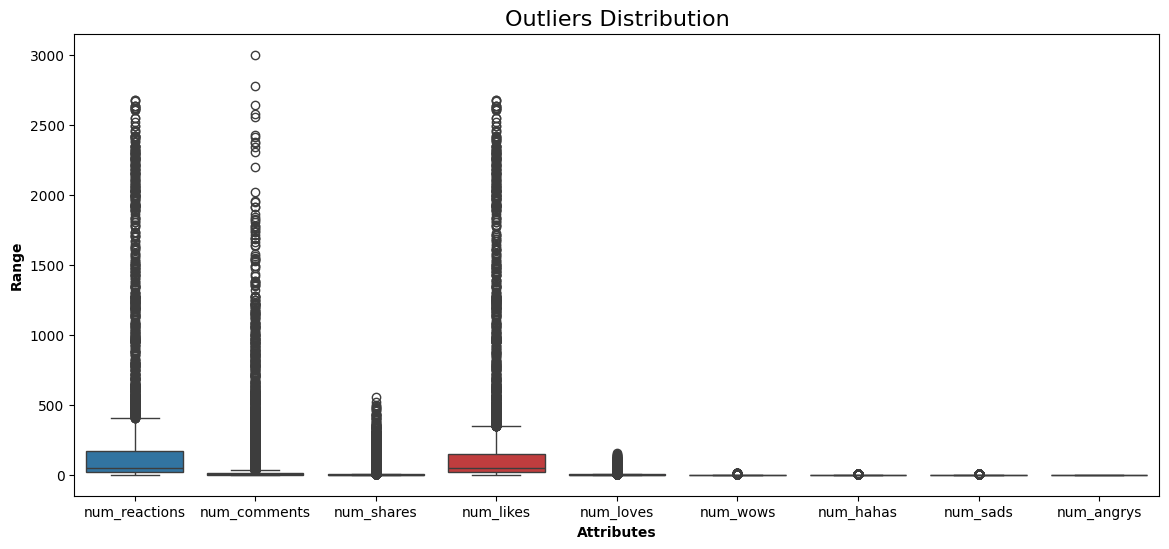

In [17]:
show_boxplot(without_outliers)

In [18]:
# Estandarizo los datos para tener la misma escala

from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(6320, 9)

In [19]:
#aplicamos el algoritmo de clustering jerarquico. hacemos las tres tecnicas de vinculación

from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [49]:
#miro el rendimiento por el metodo de silhouette

from sklearn.cluster import AgglomerativeClustering


#defino el numero de clusters

num_clusters = 2

#aplico clustering jerarquico

complete_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage="complete").fit_predict(scaled_data)
average_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage="average").fit_predict(scaled_data)
single_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage="single").fit_predict(scaled_data)



In [50]:
#calculo indice silhouette

from sklearn.metrics import silhouette_score
import numpy as np

def calculate_silhouette(labels, data):
    if len(set(labels)) < 2:            #siempre <2 porque necesita + de 1 cluster
        return np.nan                       
    return silhouette_score(data, labels)

silhouette_complete = calculate_silhouette(complete_labels, scaled_data)
silhouette_average = calculate_silhouette(average_labels, scaled_data)
silhouette_single = calculate_silhouette(single_labels, scaled_data)

print(f"Silhouette Score (Complete Linkage): {silhouette_complete}")
print(f"Silhouette Score (Average Linkage): {silhouette_average}")
print(f"Silhouette Score (Single Linkage): {silhouette_single}")

#se ha realizado el modelo silhouette con 2 y 3 clusterings. La media con 2 da 0,7847, mientras que la de 3 clusters
#da 0,7720. Se decide coger 2 clusters

Silhouette Score (Complete Linkage): 0.7831059627222424
Silhouette Score (Average Linkage): 0.7847342927877855
Silhouette Score (Single Linkage): 0.8403863318774092


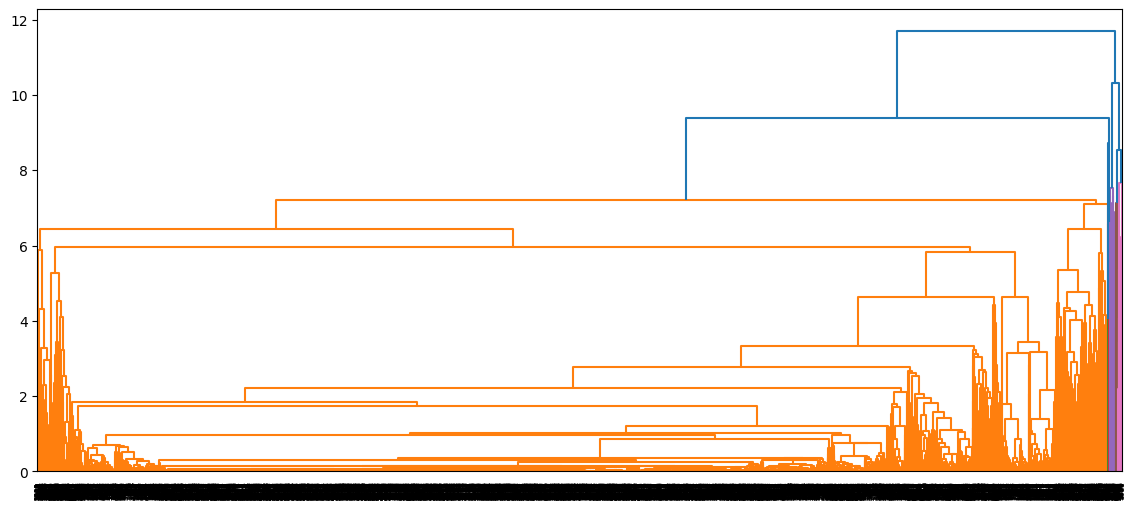

In [52]:
dendrogram(average_clustering)
plt.show()

<Axes: xlabel='Cluster', ylabel='num_likes'>

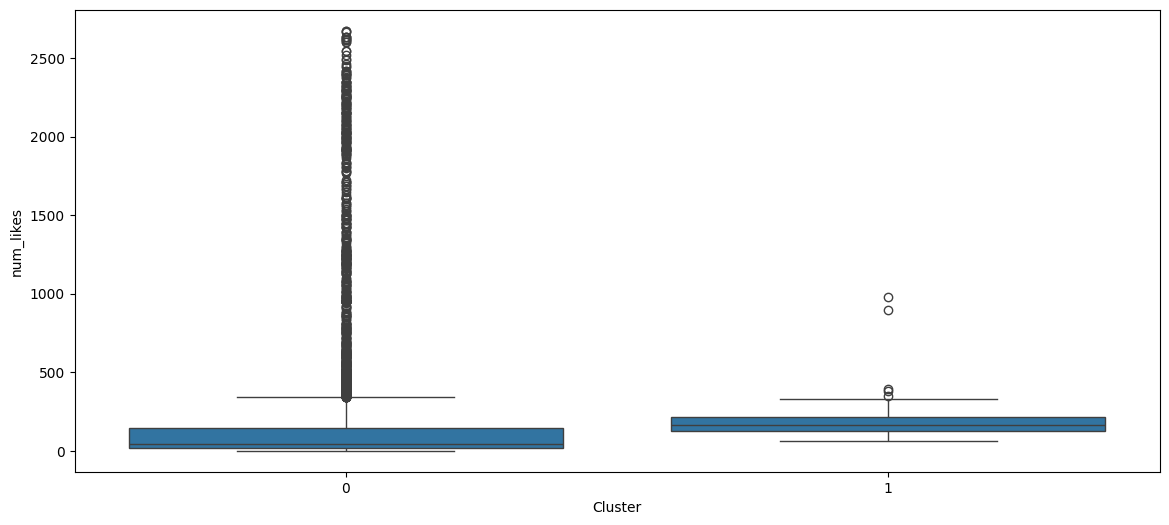

In [51]:
#segun lo visto en los graficos anteriores, lo mejor es hacer 2 clusterings
#miro una variable' num_likes' para ver como se distribuye en los 2 clusters definidos.

from scipy.cluster.hierarchy import linkage, cut_tree

cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels
sns.boxplot(x='Cluster', y='num_likes', data=without_outliers)
